Iteration: 5000 / 5000, Sample: 4 / 4

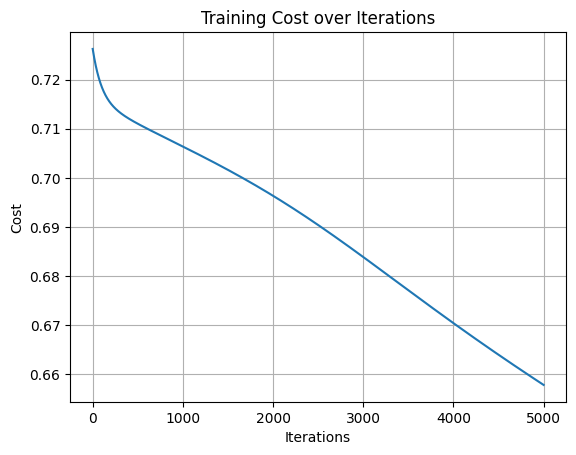


Predictions after training:
Input: [0 1] => Output: 0.5197 => Predicted: 1
Input: [1 0] => Output: 0.5259 => Predicted: 1
Input: [1 1] => Output: 0.5905 => Predicted: 1
Input: [0 0] => Output: 0.3567 => Predicted: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# XOR inputs
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# Expected outputs
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

# Architecture
num_i_units = 2
num_h_units = 2
num_o_units = 1

# Hyperparameters
learning_rate = 0.01
reg_param = 0
max_iter = 5000
m = X.shape[0]

# Seed
np.random.seed(1)

# Weight and bias initialization
W1 = np.random.normal(0, 1, (num_h_units, num_i_units))
W2 = np.random.normal(0, 1, (num_o_units, num_h_units))
B1 = np.random.random((num_h_units, 1))
B2 = np.random.random((num_o_units, 1))

# Sigmoid function
def sigmoid(z, derv=False):
    sig = 1 / (1 + np.exp(-z))
    if derv:
        return sig * (1 - sig)
    return sig

# Forward propagation for prediction
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1)
    z2 = W1.dot(a1) + B1
    a2 = sigmoid(z2)
    z3 = W2.dot(a2) + B2
    a3 = sigmoid(z3)
    if predict:
        return a3
    return a1, a2, a3

# Cost tracking
cost = np.zeros((max_iter, 1))

# Training function
def train(_W1, _W2, _B1, _B2):
    epsilon = 1e-9  # To avoid log(0)
    for i in range(max_iter):
        c = 0
        dW1 = np.zeros_like(_W1)
        dW2 = np.zeros_like(_W2)
        dB1 = np.zeros_like(_B1)
        dB2 = np.zeros_like(_B2)

        for j in range(m):
            sys.stdout.write(f"\rIteration: {i + 1} / {max_iter}, Sample: {j + 1} / {m}")
            a0 = X[j].reshape(-1, 1)
            y_true = y[j].reshape(-1, 1)

            # Forward pass
            z1 = _W1 @ a0 + _B1
            a1 = sigmoid(z1)
            z2 = _W2 @ a1 + _B2
            a2 = sigmoid(z2)

            # Backward pass
            dz2 = a2 - y_true
            dW2 += dz2 @ a1.T
            dB2 += dz2
            dz1 = (_W2.T @ dz2) * sigmoid(z1, derv=True)
            dW1 += dz1 @ a0.T
            dB1 += dz1

            # Cross-entropy cost
            c += - (y_true * np.log(a2 + epsilon)) - ((1 - y_true) * np.log(1 - a2 + epsilon))
            sys.stdout.flush()

        # Update parameters
        _W1 -= learning_rate * dW1 / m
        _W2 -= learning_rate * dW2 / m
        _B1 -= learning_rate * dB1 / m
        _B2 -= learning_rate * dB2 / m

        # Save cost
        cost[i] = c / m

    return _W1, _W2, _B1, _B2

# Train the model
W1, W2, B1, B2 = train(W1, W2, B1, B2)

# Plot training cost
plt.plot(range(max_iter), cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Training Cost over Iterations")
plt.grid(True)
plt.show()

# Prediction
print("\nPredictions after training:")
for x in X:
    out = forward(x, predict=True)
    print(f"Input: {x} => Output: {out[0][0]:.4f} => Predicted: {int(out[0][0] > 0.5)}")
